In [22]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale = 1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
titanic_path = r"C:\Users\12489\Documents\Data\titanic.csv"

df = pd.read_csv(titanic_path)

df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


-----------------------------------------

## Clean the data

In [24]:
# remove columns that we don't need

df = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
# boat = lifeboat

df.head()
# sibsp = siblings/spouses
# parch = parents/children

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S


In [25]:
df.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [26]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
df.groupby(['pclass']).mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992
2,0.429603,29.506705,0.393502,0.368231,21.179196
3,0.255289,24.816367,0.568406,0.400564,13.302889


In [28]:
df['age'] = df[['age', 'pclass']].apply(age_approx, axis=1)

In [29]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    2
dtype: int64

In [30]:
# since we only have three left, lets just drop them

df.dropna(inplace=True)
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

------------------------------

## ensure everything is a number

In [31]:
df.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [32]:
df_with_dummies = pd.get_dummies(df, columns=['sex'])

df_with_dummies = pd.get_dummies(df_with_dummies, columns=['embarked'])

In [33]:
df_with_dummies.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,1,0,0,0,1
1,1,1,0.92,1,2,151.5500,0,1,0,0,1
2,1,0,2.00,1,2,151.5500,1,0,0,0,1
3,1,0,30.00,1,2,151.5500,0,1,0,0,1
4,1,0,25.00,1,2,151.5500,1,0,0,0,1


-------------------------------------

## now able to check for correlation

<AxesSubplot:>

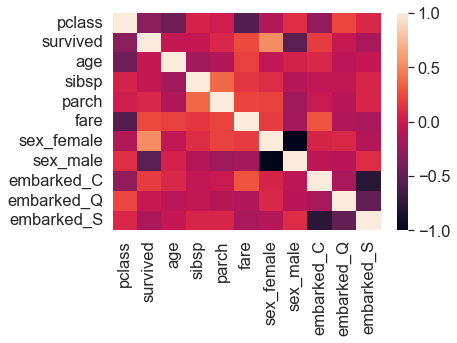

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(df_with_dummies.corr())

--------------------------------------

## isolate the target

In [35]:
chosen_features = ['pclass', 'age', 'sibsp', 'parch', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']

X = df_with_dummies[chosen_features].values
y = df_with_dummies['survived']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
# ensure everything matches

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 9)
(392, 9)
(914,)
(392,)


----------------------------

## regression time

In [38]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = log_reg.predict(X_test)

-------------------------------

## confusion matrix time

In [40]:
metrics.confusion_matrix(y_test, y_pred)

array([[211,  32],
       [ 41, 108]], dtype=int64)

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.8137755102040817

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       243
           1       0.77      0.72      0.75       149

    accuracy                           0.81       392
   macro avg       0.80      0.80      0.80       392
weighted avg       0.81      0.81      0.81       392

